# Udacity Data Analyst Project: WeRateDog

This project provide practice and learning experience in Data wrangling, which consists of:
1. **Gathering data**
2. **Assessing data**
3. **Cleaning data**

## **Gathering Data**
Gather each of the three pieces of data as described below in thid Jupyter Notebook:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: `twitter_archive_enhanced.csv`

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [1]:
import requests
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
currentWorkSpacePath = '/home/workspace'
fileName = url.split('/')[-1]
response = requests.get(url)

with open(os.path.join(currentWorkSpacePath, fileName), mode='wb') as file:
    file.write(response.content)


In [3]:
os.listdir('/home/workspace')

['WeRateDog_archive_master.csv',
 '.ipynb_checkpoints',
 'info.csv',
 'twitter-archive-enhanced.csv',
 'wrangle_act.ipynb',
 'image-predictions.tsv',
 'tweet_json.txt']

In [4]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2070,671122204919246848,NaN,NaN,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671122204...,4,10,None,None,None,None,None
192,855818117272018944,NaN,NaN,2017-04-22 16:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,NaN,NaN,NaN,https://twitter.com/markhalperin/status/855656...,13,10,None,None,None,None,None
971,750101899009982464,NaN,NaN,2016-07-04 23:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,None,None,None,None


3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this `.txt` file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission

In [5]:
# import tweepy and setup tweepy client object
import tweepy

consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
tweet_result = {}
for tweet_id in list(archive_df.tweet_id):
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_result[str(tweet_id)] = tweet_status._json
    except Exception as e:
        print("Error for: " + str(tweet_id))


Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745


In [ ]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_result, file)

In [ ]:
with open('tweet_json.txt') as file:
    data = json.load(file)

df_list = []

for tweet_id in data.keys():
    favorite = data[tweet_id]['favorite_count']
    retweet = data[tweet_id]['retweet_count']
    df_list.append({'tweet_id':tweet_id, 'retweet_count':retweet, 'favorite_count':favorite})

info_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
info_df.to_csv('info.csv')
os.listdir('/home/workspace')

## **Assessing Data**
Detect and document at least eight (8) quality issues and two (2) tidiness issues

In [29]:
info_df = pd.read_csv('info.csv')
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
img_df = pd.read_csv('image-predictions.tsv',sep='\t')

We have 3 dataframes:
- `info_df` contains tweet_id, retweet count and favorite count
- `archive_df` contains tweet_id, dog rating, dog type and name
- `img_df` contains is a neutral network that prediction a dog's breed based on the image of the dog


In [3]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 4 columns):
Unnamed: 0        2337 non-null int64
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(4)
memory usage: 73.1 KB


In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
info_df.describe()

,Unnamed: 0,tweet_id,retweet_count,favorite_count
count,2337.000000,2.337000e+03,2337.000000,2337.000000
mean,1168.000000,7.420692e+17,2873.663243,7834.970475
std,674.778112,6.824243e+16,4854.146683,12146.463934
min,0.000000,6.660209e+17,1.000000,0.000000
25%,584.000000,6.783345e+17,579.000000,1357.000000
50%,1168.000000,7.185406e+17,1344.000000,3414.000000
75%,1752.000000,7.986825e+17,3350.000000,9593.000000
max,2336.000000,8.924206e+17,82340.000000,162011.000000


In [10]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
info_df.sample(5)

,Unnamed: 0,tweet_id,retweet_count,favorite_count
654,654,790227638568808452,3859,0
483,483,813157409116065792,2390,8177
148,148,862096992088072192,23165,73749
1557,1557,687476254459715584,559,2050
1514,1514,690005060500217858,1776,3790


In [12]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
info_df[info_df.duplicated()]

,Unnamed: 0,tweet_id,retweet_count,favorite_count


In [14]:
img_df[img_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
archive_df[archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Bailey        7
Toby          7
Buddy         7
an            7
Stanley       6
Koda          6
Jax           6
Rusty         6
Scout         6
Jack          6
Leo           6
Bella         6
Dave          6
Milo          6
Oscar         6
George        5
           ... 
Emanuel       1
my            1
River         1
Pilot         1
Boots         1
Amélie        1
Tango         1
Tycho         1
Bayley        1
Dobby         1
Yukon         1
Zooey         1
Bobb          1
Brooks        1
Ralph         1
Aiden         1
Superpup      1
Ashleigh      1
Beckham       1
Beemo         1
Lilli         1
Combo         1
Stefan        1
Luther        1
Angel         1
Champ         1
Tom           1
Miguel        1
Moofasa       1
Blipson       1
Name: name, Length: 957,

#### Data Quality issues:
- `tweet_id` column data type should be string instead of int
- `rating_denominator`, `rating_numerator` column data type should be string instead of int
- There are tweets any image. We only want tweets with image.
- We only want original tweets, not retweets
- Some denominators and numerators are incorrect.
- Dog stages are incorrect
- For the dog stages `name`, `doggo`, `floofer`, `pupper`, `puppo`, null value are represented by `None` instead of `Nan`
- Remove duplicated tweet
- `timestamp` should be in to_datetime data type

#### Tidiness issues:
1. `rating_numerator` and `rating_denominator` should be in one column
2. `doggo`, `floofer`, `pupper`, `puppo` should be in one column
3. Any dog with more than 1 dog stage should have `stage` value of `multiple`

In [54]:
archive_clean = archive_df.copy()
info_clean = info_df.copy()
img_clean = img_df.copy()

##### Quality issues

- `tweet_id`,`rating_denominator`, `rating_numerator` column data type should be string instead of int


In [55]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
info_clean.tweet_id = info_clean.tweet_id.astype(str)
img_clean.tweet_id = img_clean.tweet_id.astype(str)

archive_clean.rating_denominator = archive_clean.rating_denominator.astype(str)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(str)

- Dog stage name is incorrect - `floofer` should be `floof`. We will also have to update the value of the column to `floof`

In [56]:
newColumns = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floof', 'pupper', 'puppo']

archive_clean.columns = newColumns

In [57]:
archive_clean.loc[archive_clean.floof == 'floofer',['floof']] = 'floof'

##### Tidiness issues
The dog stage columns to be combined into 1 column

In [58]:
archive_clean[['doggo','floof','puppo','pupper']] = archive_clean[['doggo','floof','puppo','pupper']].replace('None','')
archive_clean['stage'] = archive_clean.doggo.str.cat([archive_clean.floof,archive_clean.puppo,archive_clean.pupper])

In [59]:
archive_clean['stage'] = archive_clean['stage'].replace('',np.nan)

In [60]:
archive_clean['stage'].value_counts()

pupper         245
doggo          83 
puppo          29 
doggopupper    12 
floof          9  
doggofloof     1  
doggopuppo     1  
Name: stage, dtype: int64

We are going to change the value of row with more than 1 stage to `multiple`

In [61]:
archive_clean.loc[archive_clean.stage == 'doggopupper',['stage']] = 'multiple'
archive_clean.loc[archive_clean.stage == 'doggofloof',['stage']] = 'multiple'
archive_clean.loc[archive_clean.stage == 'doggopuppo',['stage']] = 'multiple'

In [62]:
archive_clean['stage'].value_counts()

pupper      245
doggo       83 
puppo       29 
multiple    14 
floof       9  
Name: stage, dtype: int64

In [63]:
archive_clean = archive_clean.drop(['doggo','floof','pupper','puppo'],axis=1)

- There are tweets any image. We only want tweets with image. 
Since `info_clean` is the table of dog image, we want use to do a merge of `info_clean` and `archive_clean` using the `tweet_id` column.

In [64]:
image_df = info_clean[['tweet_id','retweet_count','favorite_count']]
tweet_clean = pd.merge(archive_clean, image_df, on=['tweet_id'],how = 'inner')

Then we will also merge in `img_clean`

In [65]:
tweet_clean = pd.merge(tweet_clean, img_clean, on=['tweet_id'],how = 'inner')

- Since we only want original tweets and not reply-tweets or retweets. We will remove any tweet with `in_reply_to_status_id` or `retweeted_status_id` value that is not null.

In [66]:
tweet_clean = tweet_clean[tweet_clean.in_reply_to_status_id.isnull()]

In [67]:
tweet_clean = tweet_clean[tweet_clean.retweeted_status_id.isnull()]

- Dog rating are incorrect. Denominators are always 10 and numerators are always above 10. 
We will manually examine the data and correct them if we can. 

In [68]:
pd.set_option('display.max_colwidth', -1)
tweet_clean[tweet_clean.rating_denominator != '10'][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
409,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
728,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
869,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
917,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
960,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
994,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1015,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1040,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1058,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [69]:
tweet_clean.loc[tweet_clean.tweet_id == '820690176645140481',['rating_numerator','rating_denominator']] = ['12','10']
tweet_clean.loc[tweet_clean.tweet_id == '758467244762497024',['rating_numerator','rating_denominator']] = ['11','10']
tweet_clean.loc[tweet_clean.tweet_id == '740373189193256964',['rating_numerator','rating_denominator']] = ['14','10']
tweet_clean.loc[tweet_clean.tweet_id == '731156023742988288',['rating_numerator','rating_denominator']] = ['12','10']
tweet_clean.loc[tweet_clean.tweet_id == '722974582966214656',['rating_numerator','rating_denominator']] = ['13','10']
tweet_clean.loc[tweet_clean.tweet_id == '716439118184652801',['rating_numerator','rating_denominator']] = ['11','10']
tweet_clean.loc[tweet_clean.tweet_id == '713900603437621249',['rating_numerator','rating_denominator']] = ['11','10']
tweet_clean.loc[tweet_clean.tweet_id == '704054845121142784',['rating_numerator','rating_denominator']] = ['12','10']
tweet_clean.loc[tweet_clean.tweet_id == '697463031882764288',['rating_numerator','rating_denominator']] = ['11','10']
tweet_clean.loc[tweet_clean.tweet_id == '684222868335505415',['rating_numerator','rating_denominator']] = ['11','10']
tweet_clean.loc[tweet_clean.tweet_id == '677716515794329600',['rating_numerator','rating_denominator']] = ['12','10']
tweet_clean.loc[tweet_clean.tweet_id == '675853064436391936',['rating_numerator','rating_denominator']] = ['11','10']

#### Tidiness issues
Now, we will merge the rating columns into one column called `rating`

In [70]:
tweet_clean['rating'] = tweet_clean.rating_numerator + '/' + tweet_clean.rating_denominator
tweet_clean = tweet_clean.drop(['rating_numerator','rating_denominator'], axis=1)


I will first remove `retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`, `retweeted_status_id`,`in_reply_to_user_id`


In [71]:
tweet_clean = tweet_clean.drop(['retweeted_status_timestamp', 'retweeted_status_user_id','retweeted_status_id','in_reply_to_user_id','in_reply_to_status_id'], axis=1)

- We will try to remove any duplicated row if there is any

In [72]:
tweet_clean[tweet_clean.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,name,stage,retweet_count,favorite_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating


- Lastly, `timestamp` should be in `datatime` object type


In [73]:
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)

## Storing, Analyzing, and Visualizing Data

We will now save this cleaned dataframe to a `master.csv` file

In [94]:
tweet_clean.to_csv('twitter_archive_master.csv', index=False)

In [86]:
tweet_clean = pd.read_csv('twitter_archive_master.csv')

In [87]:
tweet_clean.describe()

,tweet_id,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.967000e+03,1967.000000,1967.000000,1967.000000,1967.000000,1.967000e+03,1.967000e+03
mean,7.359367e+17,2619.346721,8636.936960,1.201830,0.593962,1.347112e-01,6.025337e-02
std,6.746931e+16,4673.402780,12666.159309,0.559244,0.271980,1.009816e-01,5.094543e-02
min,6.660209e+17,11.000000,76.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758494e+17,584.000000,1853.500000,1.000000,0.362880,5.370120e-02,1.619495e-02
50%,7.088109e+17,1261.000000,3909.000000,1.000000,0.587372,1.174020e-01,4.947150e-02
75%,7.879251e+17,2993.500000,10784.500000,1.000000,0.846807,1.955655e-01,9.158675e-02
max,8.924206e+17,82340.000000,162011.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


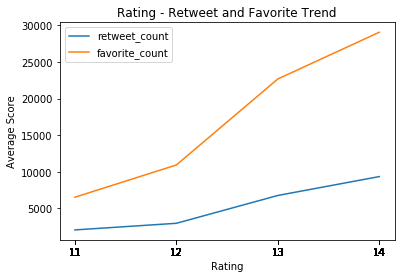

In [142]:
rating_popularity_analysis = tweet_clean[['rating','retweet_count','favorite_count']]
rating_popularity_analysis['score'], rating_popularity_analysis['base'] = rating_popularity_analysis['rating'].str.split('/', 1).str

rating_popularity_analysis.score = rating_popularity_analysis.score.astype(int)
rating_popularity_analysis.base = rating_popularity_analysis.base.astype(int)

rating_popularity_analysis = rating_popularity_analysis[rating_popularity_analysis.base == 10]
rating_popularity_analysis = rating_popularity_analysis[rating_popularity_analysis.score > 10]
rating_popularity_analysis = rating_popularity_analysis[rating_popularity_analysis.score < 15]

popularity_group_by_rating_score = rating_popularity_analysis.groupby('score').mean()

popularity_group_by_rating_score = popularity_group_by_rating_score.drop('base',axis=1)

retweet_favorite_by_rating = popularity_group_by_rating_score.plot();
plt.title('Rating - Retweet and Favorite Trend');
plt.xlabel('Rating');
plt.xticks(rating_popularity_analysis.score);
plt.ylabel('Average Score');

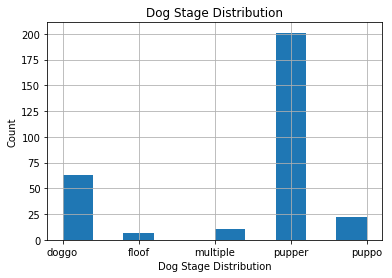

In [148]:
stage_dist = tweet_clean.stage.hist();
plt.title('Dog Stage Distribution');
plt.xlabel('Dog Stage Distribution');
plt.ylabel('Count');

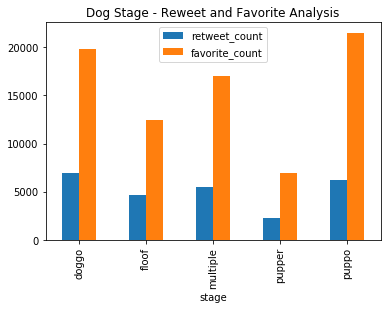

In [189]:
stage_popularity_analysis = tweet_clean[['stage','retweet_count','favorite_count']]
stage_popularity_analysis.groupby('stage').mean().plot(kind='bar',title='Dog Stage - Reweet and Favorite Analysis')

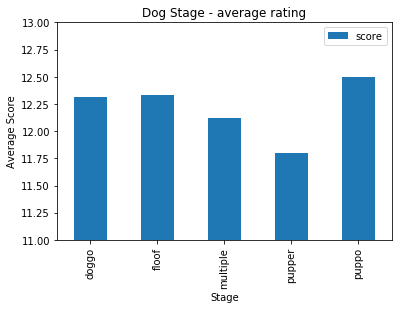

In [190]:
stage_rating_analysis = tweet_clean[['rating','stage']]
stage_rating_analysis = stage_rating_analysis[stage_rating_analysis['stage'].isnull() == False]

stage_rating_analysis['score'], stage_rating_analysis['base'] = stage_rating_analysis['rating'].str.split('/', 1).str

stage_rating_analysis.score = stage_rating_analysis.score.astype(int)
stage_rating_analysis.base = stage_rating_analysis.base.astype(int)

stage_rating_analysis = stage_rating_analysis[stage_rating_analysis.base == 10]
stage_rating_analysis = stage_rating_analysis[stage_rating_analysis.score > 10]
stage_rating_analysis = stage_rating_analysis[stage_rating_analysis.score < 15] 
stage_rating_analysis = stage_rating_analysis.drop(['base','rating'],axis=1)

stage_rating_analysis.groupby('stage').mean().plot(kind='bar');
plt.title('Dog Stage - average rating');
plt.xlabel('Stage');
plt.ylim(11,13);
plt.ylabel('Average Score');

### Insights

1. There seems to be a positive correlation between dog rating to the both number of retweet and number of favorite.
2. According to the graph on Dog stage distribution, pupper has the highest frequency.
3. Interestingly, pupper has the lowest favorite counts and retweet counts, as well as rating.